In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore',category=UserWarning)

In [2]:
meters = pd.read_csv("C:\\Users\\Oluwajuwon\\Documents\\Smart Systems\\Projects\\Data Science Projects\\project_notebooks\\cleaned_energy_data.csv")

In [3]:
meters['timestamp'] = pd.to_datetime(meters.timestamp)

In [4]:
aed = meters[meters['meter_id'] == 'AED201']

<Axes: xlabel='timestamp'>

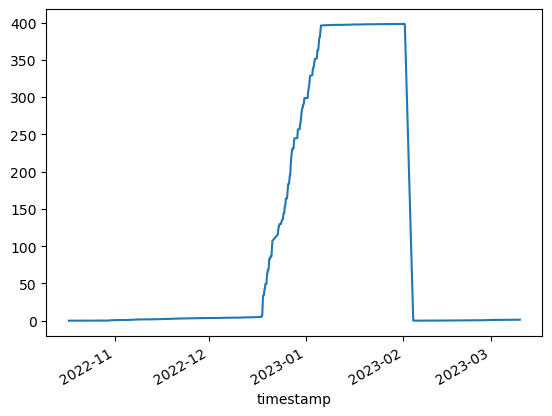

In [5]:
aed.set_index('timestamp')['energy'].plot()

In [6]:
a1 = aed[['timestamp','energy']]

In [7]:
a1.set_index('timestamp',inplace=True)

In [8]:
a2 = a1.loc['2022-10-29']

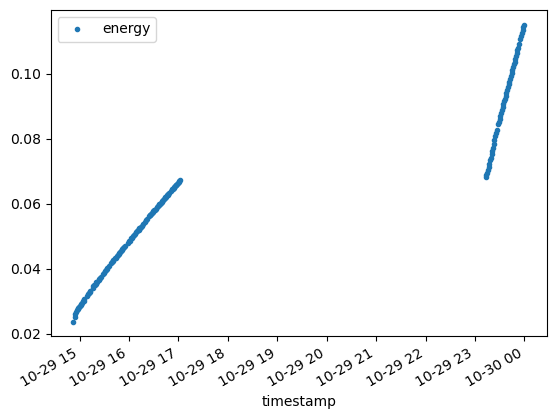

In [9]:
a2.plot(style='.')
plt.show()

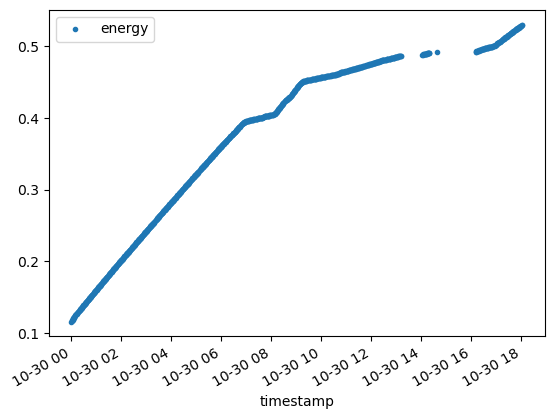

In [10]:
a1.loc['2022-10-30'].plot(style='.')
plt.show()

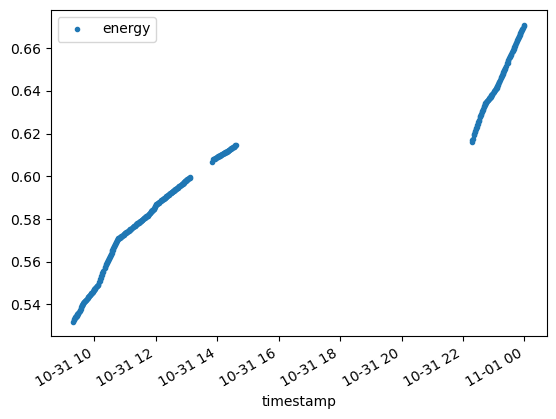

In [11]:
a1.loc['2022-10-31'].plot(style='.')
plt.show()

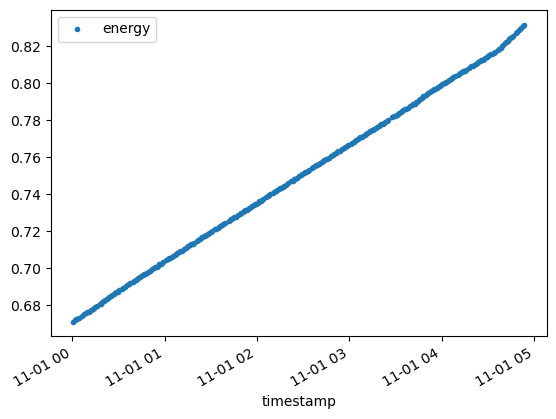

In [12]:
a1.loc['2022-11-1'].plot(style='.')
plt.show()

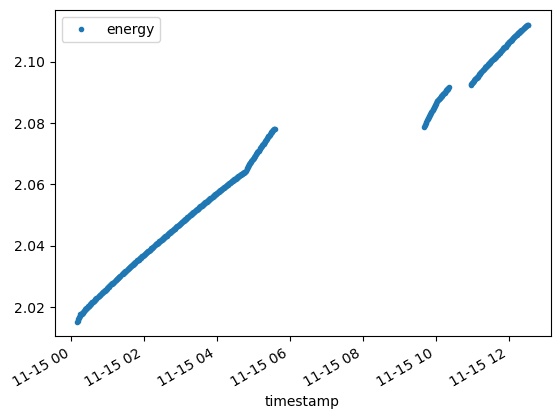

In [13]:
a1.loc['2022-11-15'].plot(style='.')
plt.show()

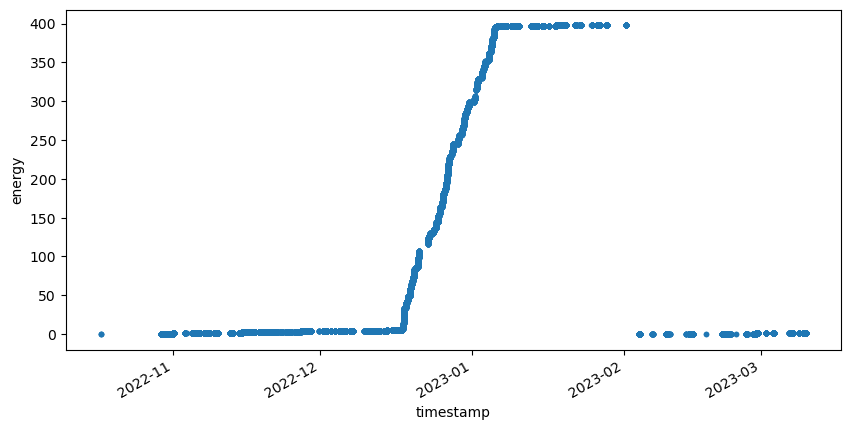

In [14]:
aed.set_index('timestamp')['energy'].plot(style = '.',figsize=[10,5])
plt.ylabel('energy')
plt.show()

In [15]:
aed['energy'].describe()

count    38662.000000
mean       126.327867
std        160.178357
min          0.001300
25%          2.144925
50%          4.475450
75%        281.534200
max        398.089100
Name: energy, dtype: float64

In [16]:
a = aed.set_index('timestamp')

In [17]:
a = a['energy']

In [18]:
a['2023'].resample('M').first()

timestamp
2023-01-31 00:00:00+01:00    298.7347
2023-02-28 00:00:00+01:00    398.0432
2023-03-31 00:00:00+01:00      0.9617
Freq: M, Name: energy, dtype: float64

In [19]:
pd.DataFrame(a.loc['2023-02':])

,energy
timestamp,
2023-02-01 08:06:11+01:00,398.0432
2023-02-01 08:08:04+01:00,398.0442
2023-02-01 08:08:58+01:00,398.0446
2023-02-01 08:09:53+01:00,398.0450
2023-02-01 08:10:47+01:00,398.0454
...,...
2023-03-10 01:56:33+01:00,1.3350
2023-03-10 01:57:27+01:00,1.3353
2023-03-10 01:58:21+01:00,1.3358


In [20]:
set(a.index.date)

{datetime.date(2022, 10, 17),
 datetime.date(2022, 10, 29),
 datetime.date(2022, 10, 30),
 datetime.date(2022, 10, 31),
 datetime.date(2022, 11, 1),
 datetime.date(2022, 11, 3),
 datetime.date(2022, 11, 4),
 datetime.date(2022, 11, 5),
 datetime.date(2022, 11, 6),
 datetime.date(2022, 11, 7),
 datetime.date(2022, 11, 8),
 datetime.date(2022, 11, 9),
 datetime.date(2022, 11, 10),
 datetime.date(2022, 11, 12),
 datetime.date(2022, 11, 13),
 datetime.date(2022, 11, 14),
 datetime.date(2022, 11, 15),
 datetime.date(2022, 11, 16),
 datetime.date(2022, 11, 17),
 datetime.date(2022, 11, 18),
 datetime.date(2022, 11, 19),
 datetime.date(2022, 11, 20),
 datetime.date(2022, 11, 21),
 datetime.date(2022, 11, 22),
 datetime.date(2022, 11, 23),
 datetime.date(2022, 11, 24),
 datetime.date(2022, 11, 25),
 datetime.date(2022, 11, 26),
 datetime.date(2022, 11, 27),
 datetime.date(2022, 11, 28),
 datetime.date(2022, 11, 29),
 datetime.date(2022, 11, 30),
 datetime.date(2022, 12, 1),
 datetime.date(2022

In [21]:
data = pd.DataFrame(a.loc['2022-11':'2022-12'])

In [22]:
data

,energy
timestamp,
2022-11-01 00:00:36+01:00,0.6713
2022-11-01 00:01:31+01:00,0.6719
2022-11-01 00:02:25+01:00,0.6724
2022-11-01 00:03:19+01:00,0.6728
2022-11-01 00:04:13+01:00,0.6733
...,...
2022-12-31 10:07:33+01:00,298.5170
2022-12-31 10:08:27+01:00,298.5472
2022-12-31 10:09:21+01:00,298.5882


In [24]:
data = data.reset_index()

In [27]:
from datetime import datetime

In [29]:
datetime(2020,1,1,1,0)

datetime.datetime(2020, 1, 1, 1, 0)

In [33]:
time_diff = (data['timestamp'] - data['timestamp'].shift()).fillna(pd.Timedelta(seconds=0))

In [37]:
time_diff = time_diff.apply(lambda x: x.total_seconds())

In [42]:
energy_diff = data['energy'].diff().fillna(0)

In [44]:
energy_rate = energy_diff/time_diff

In [39]:
time_window = 10

In [49]:
time_diff.mean()

211.72171303430935

In [67]:
std_energy_rate = energy_rate.rolling(window=10, min_periods=1).std()

In [68]:
std_energy_rate.mean()

2.450724261289934e-05

In [56]:
energy_rate.mean()

0.00020640276972471344

In [51]:
mean_energy_rate = energy_rate.mean()

In [70]:
if std_energy_rate.mean() < mean_energy_rate * 0.2:
    print('Energy rate is relatively constant over short time intervals')
else:
    print('Energy rate is not relatively constant over short time intervals')

Energy rate is relatively constant over short time intervals


In [71]:
exact_energy = energy_rate.cumsum()

In [72]:
data['exact_energy'] = exact_energy

In [89]:
df = data.set_index('timestamp').resample('H').sum().reset_index()

In [114]:
df1 = df.drop('energy',axis=1)
df1 = df1.rename(columns={'timestamp':'ds','exact_energy':'y'})
df1['ds'] = df1['ds'].dt.tz_localize(None)

In [115]:
train = df1[:int(0.8*df1.shape[0])]

In [116]:
test = df1[int(0.8*df1.shape[0]):]

In [84]:
from prophet import Prophet

In [107]:
prp_model = Prophet()

In [117]:
prp_model.fit(train)

15:19:27 - cmdstanpy - INFO - Chain [1] start processing
15:19:28 - cmdstanpy - INFO - Chain [1] done processing


In [120]:
pred = prp_model.predict(test)

In [121]:
mean_absolute_percentage_error(test['y'],pred.yhat)

2.323164195260179e+16